# Exploratory Data Analysis (EDA)

In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc)
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# read data
data = pd.read_csv('training_loan_data.csv', header=1)
data.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


In [2]:
data.describe()

,id,member_id,loan_amnt,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
count,1.991210e+05,1.894570e+05,199121.000000,1.894570e+05,180419.000000,180333.000000,189457.000000,189457.000000,161472.000000,181962.000000,32749.000000,181962.000000,1.617160e+05,199121.0,199121.000000,189457.000000
mean,1.009857e+07,5.929626e+06,14071.947334,7.224330e+04,53.575807,66.840867,17.061084,0.803549,6.993634,20239.424699,41.780054,20238.384308,1.373215e+05,1.0,183.967954,0.069293
std,5.704397e+04,3.339822e+06,8067.076636,5.180483e+04,34.153946,26.111490,7.596941,1.032936,5.879707,18879.795379,20.984599,18941.591779,1.507358e+05,0.0,104.858324,0.253952
min,1.000000e+07,1.515360e+05,1000.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0,14.000000,0.000000
25%,1.004958e+07,2.308792e+06,8000.000000,4.500000e+04,25.000000,49.500000,11.340000,0.000000,2.000000,7800.000000,25.000000,7834.720066,2.746575e+04,1.0,105.000000,0.000000
50%,1.009823e+07,6.060627e+06,12000.000000,6.200000e+04,50.000000,72.200000,16.780000,0.000000,6.000000,14700.000000,41.000000,14637.479485,8.076050e+04,1.0,157.000000,0.000000
75%,1.014801e+07,8.727745e+06,19600.000000,8.700000e+04,80.000000,89.000000,22.580000,1.000000,11.000000,26500.000000,58.000000,26397.825272,2.082122e+05,1.0,256.000000,0.000000
max,1.019779e+07,1.209899e+07,35000.000000,7.141778e+06,100.000000,339.600000,34.990000,8.000000,24.000000,522210.000000,165.000000,520643.298200,8.000078e+06,1.0,456.000000,1.000000


In [3]:
# application_approved_flag has no variation, remove it
# id and member_id is not used for model building
#desc's info is included in purpose
data = data.drop(columns=['id', 'desc', 'member_id', 'application_approved_flag'])
data.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,internal_score,bad_flag
0,7550,36 months,16.24%,3 years,RENT,28000.0,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,99,0.0
1,27050,36 months,10.99%,10+ years,OWN,55000.0,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,353,0.0
2,12000,36 months,10.99%,4 years,RENT,60000.0,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,157,0.0
3,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,365,0.0
4,12000,36 months,13.53%,10+ years,RENT,40000.0,debt_consolidation,33.3,79.6,16.94,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,157,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    199121 non-null  int64  
 1   term                         189457 non-null  object 
 2   int_rate                     189457 non-null  object 
 3   emp_length                   181531 non-null  object 
 4   home_ownership               189457 non-null  object 
 5   annual_inc                   189457 non-null  float64
 6   purpose                      189457 non-null  object 
 7   percent_bc_gt_75             180419 non-null  float64
 8   bc_util                      180333 non-null  float64
 9   dti                          189457 non-null  float64
 10  inq_last_6mths               189457 non-null  float64
 11  mths_since_recent_inq        161472 non-null  float64
 12  revol_util                   189330 non-null  object 
 13 

In [6]:
# Function to clean percentage columns
def clean_percentage(column):
    return column.str.replace('%', '').astype(float)

# Apply the function to 'int_rate' and 'revol_rate' if they are strings
if data['int_rate'].dtype == 'object':
    data['int_rate'] = clean_percentage(data['int_rate'])

if data['revol_util'].dtype == 'object':
    data['revol_util'] = clean_percentage(data['revol_util'])


### visualize the response 'bad_flag' (a binary column):

Counts:
 0.0    176329
1.0     13128
Name: bad_flag, dtype: int64

Ratios:
 0.0    0.930707
1.0    0.069293
Name: bad_flag, dtype: float64


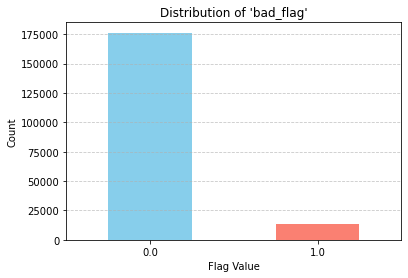

In [8]:
# visualize 'bad_flag' (a binary column):
count_values = data['bad_flag'].value_counts()
ratio_values = data['bad_flag'].value_counts(normalize=True)

# Print the counts and ratios
print("Counts:\n", count_values)
print("\nRatios:\n", ratio_values)

# Plot the distribution as a bar chart
plt.figure(figsize=(6,4))
count_values.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of 'bad_flag'")
plt.xlabel("Flag Value")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:

# Check for missing values in 'bad_flag'
missing_bad_flag = data['bad_flag'].isnull().sum()
total_rows = len(data)

print(f"Total Rows: {total_rows}")
print(f"Missing 'bad_flag' Values: {missing_bad_flag}")
print(f"Percentage Missing: {missing_bad_flag / total_rows * 100:.2f}%")


Total Rows: 199121
Missing 'bad_flag' Values: 9664
Percentage Missing: 4.85%


In [10]:
# Drop rows where 'bad_flag' is missing
data = data.dropna(subset=['bad_flag'])

# Verify the removal
new_missing_bad_flag = data['bad_flag'].isnull().sum()
print(f"Missing 'bad_flag' after dropping: {new_missing_bad_flag}")
print(f"Rows after Dropping: {len(data)}")


Missing 'bad_flag' after dropping: 0
Rows after Dropping: 189457


In [11]:
## check missing values in all columns
missing_values_count = data.isnull().sum()

# Display the counts of missing values
print("Missing Values per Column:")
print(missing_values_count)

Missing Values per Column:
loan_amnt                           0
term                                0
int_rate                            0
emp_length                       7926
home_ownership                      0
annual_inc                          0
purpose                             0
percent_bc_gt_75                 9038
bc_util                          9124
dti                                 0
inq_last_6mths                      0
mths_since_recent_inq           27985
revol_util                        127
total_bc_limit                   7495
mths_since_last_major_derog    156708
tot_hi_cred_lim                  7495
tot_cur_bal                     27741
internal_score                      0
bad_flag                            0
dtype: int64


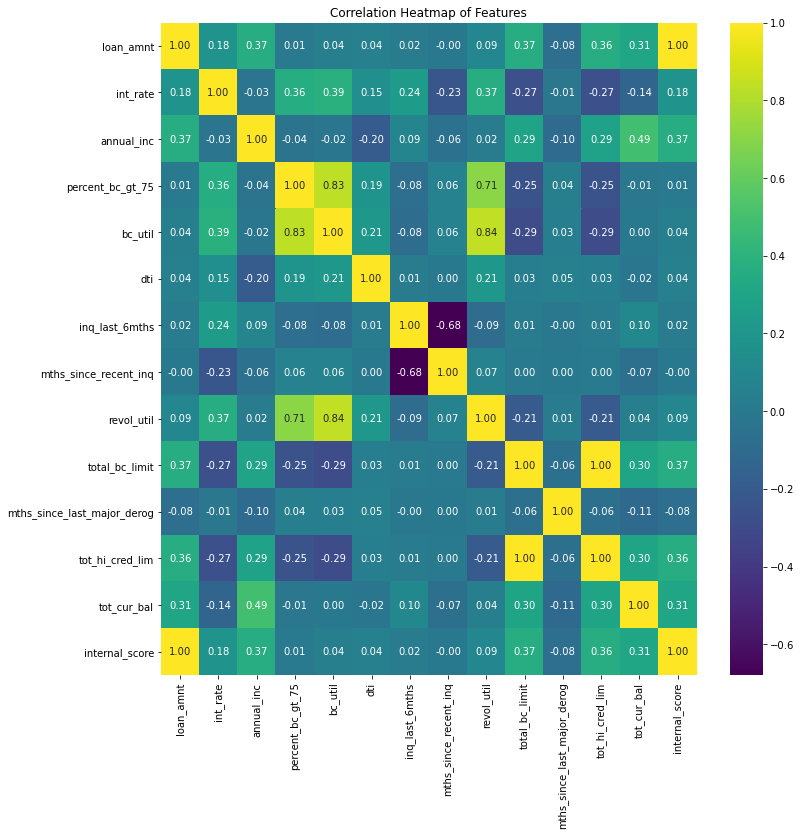

In [13]:
## check correlation
features = data.iloc[:, :-1]  # all columns except the last one
target = data.iloc[:, -1]     # just the last column

# Create a correlation heatmap
plt.figure(figsize=(12,12))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
sns.heatmap(features.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

##### There are two perfect match: ['loan_amnt', 'internal_score'] and ['total_bc_limit', 'tot_hi_cred_lim']
##### explore their distribution on response

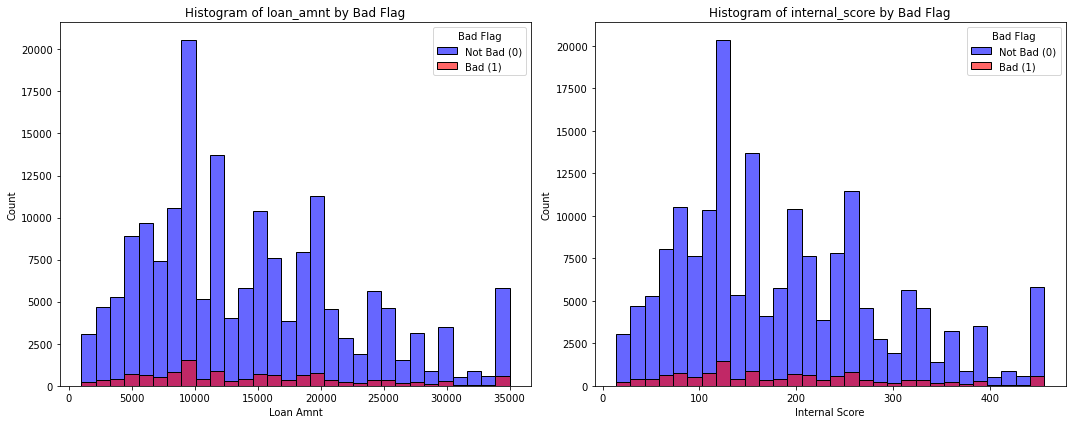

In [14]:
features = ['loan_amnt', 'internal_score']
plt.figure(figsize=(15, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=data[data['bad_flag'] == 0], x=feature, bins=30, color='blue', 
                 label='Not Bad (0)', kde=False, alpha=0.6)
    sns.histplot(data=data[data['bad_flag'] == 1], x=feature, bins=30, color='red', 
                 label='Bad (1)', kde=False, alpha=0.6)
    plt.title(f'Histogram of {feature} by Bad Flag')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.legend(title='Bad Flag')
    
plt.tight_layout()
plt.show()


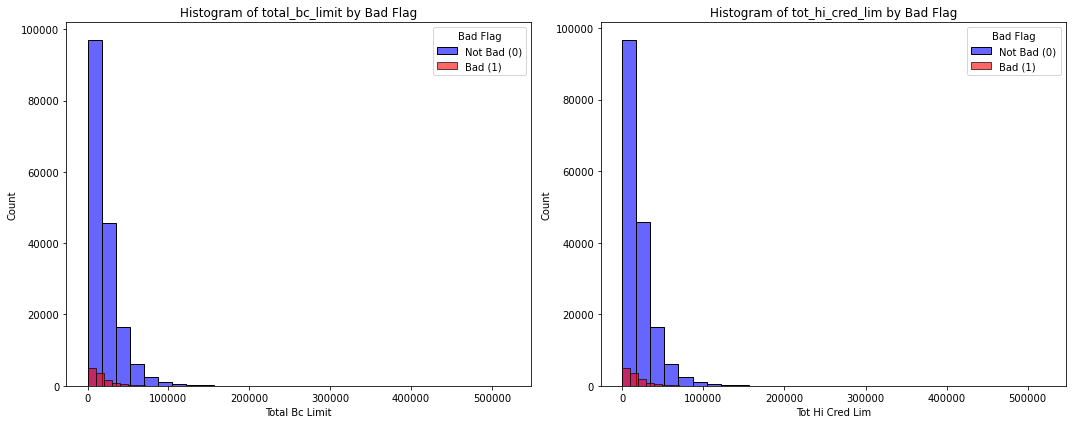

In [15]:
features = ['total_bc_limit', 'tot_hi_cred_lim']
plt.figure(figsize=(15, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=data[data['bad_flag'] == 0], x=feature, bins=30, color='blue', 
                 label='Not Bad (0)', kde=False, alpha=0.6)
    sns.histplot(data=data[data['bad_flag'] == 1], x=feature, bins=30, color='red', 
                 label='Bad (1)', kde=False, alpha=0.6)
    plt.title(f'Histogram of {feature} by Bad Flag')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.legend(title='Bad Flag')
    
plt.tight_layout()
plt.show()


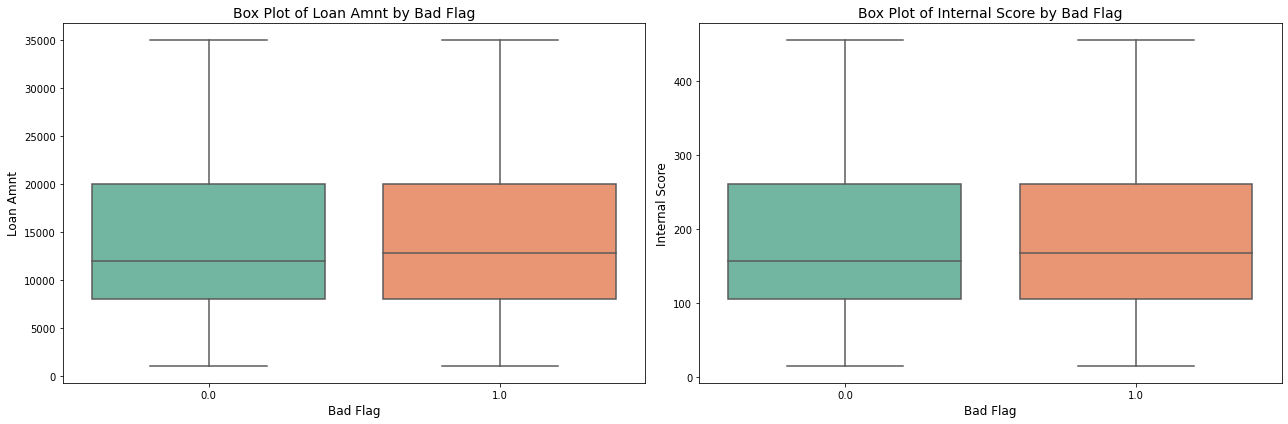

In [16]:
# Box plot
features = ['loan_amnt', 'internal_score']

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for ax, feature in zip(axes, features):
    sns.boxplot(x='bad_flag', y=feature, data=data, ax=ax, palette='Set2')
    ax.set_title(f'Box Plot of {feature.replace("_", " ").title()} by Bad Flag', fontsize=14)
    ax.set_xlabel('Bad Flag', fontsize=12)
    ax.set_ylabel(feature.replace('_', ' ').title(), fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


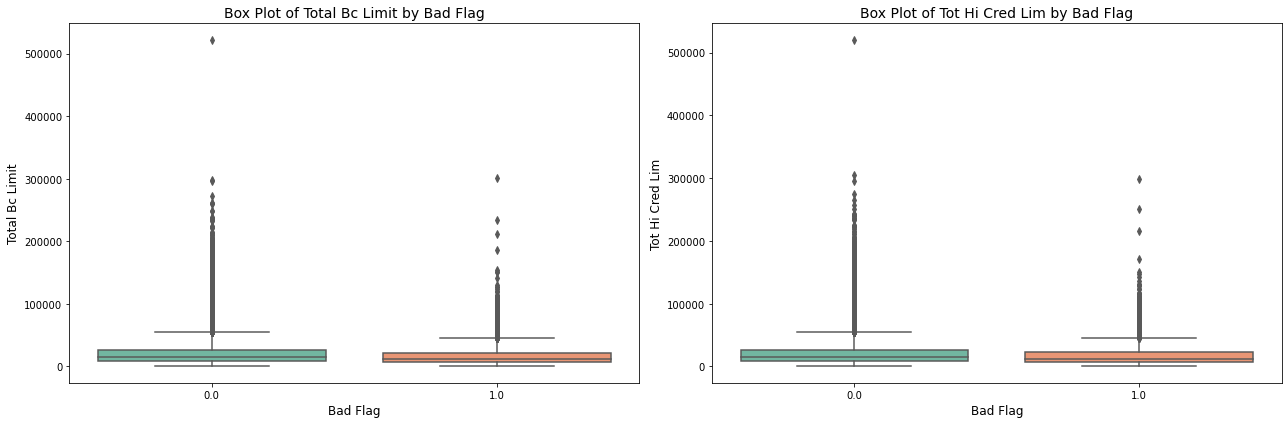

In [17]:
# Define the features to plot
features = ['total_bc_limit', 'tot_hi_cred_lim']

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for ax, feature in zip(axes, features):
    sns.boxplot(x='bad_flag', y=feature, data=data, ax=ax, palette='Set2')
    ax.set_title(f'Box Plot of {feature.replace("_", " ").title()} by Bad Flag', fontsize=14)
    ax.set_xlabel('Bad Flag', fontsize=12)
    ax.set_ylabel(feature.replace('_', ' ').title(), fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


In [18]:
data.groupby(by='bad_flag')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
bad_flag,,,,,,,,
0.0,176329.0,14333.472798,8089.910938,1000.0,8000.0,12000.0,20000.0,35000.0
1.0,13128.0,14624.544866,8400.381698,1000.0,8000.0,12800.0,20000.0,35000.0


In [19]:
data.groupby(by='bad_flag')['internal_score'].describe()

,count,mean,std,min,25%,50%,75%,max
bad_flag,,,,,,,,
0.0,176329.0,187.367432,105.155266,14.0,105.0,157.0,261.0,456.0
1.0,13128.0,191.149756,109.192960,14.0,105.0,167.0,261.0,456.0


In [20]:
data.groupby(by='bad_flag')['total_bc_limit'].describe()

,count,mean,std,min,25%,50%,75%,max
bad_flag,,,,,,,,
0.0,169882.0,20480.239484,19045.269483,0.0,8000.0,14900.0,26800.0,522210.0
1.0,12080.0,16852.827235,15997.790667,0.0,6500.0,12300.0,22200.0,301720.0


In [21]:
data.groupby(by='bad_flag')['tot_hi_cred_lim'].describe()

,count,mean,std,min,25%,50%,75%,max
bad_flag,,,,,,,,
0.0,169882.0,20478.462396,19108.058789,0.0,7940.836327,14816.937660,26728.353273,520643.2982
1.0,12080.0,16862.147074,16047.445119,0.0,6487.763669,12275.861615,22273.424490,298024.5853


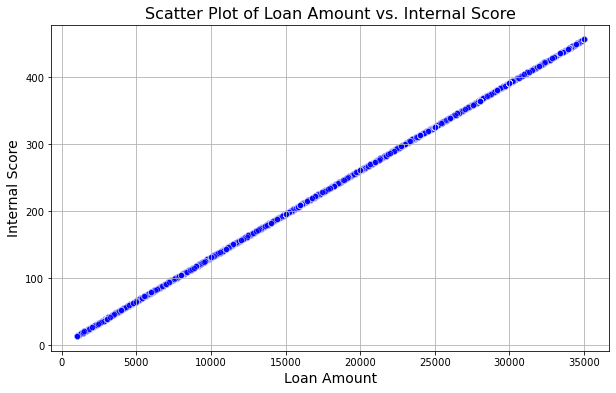

In [60]:
## scatter plot of 'loan_amnt' and 'internal_score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='internal_score', data=data, color='blue', alpha=0.6)
plt.title('Scatter Plot of Loan Amount vs. Internal Score', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Internal Score', fontsize=14)
plt.grid(True)
plt.show()

##### Perfect match between 'loan_amnt' and 'internal_score'. can delete one feature

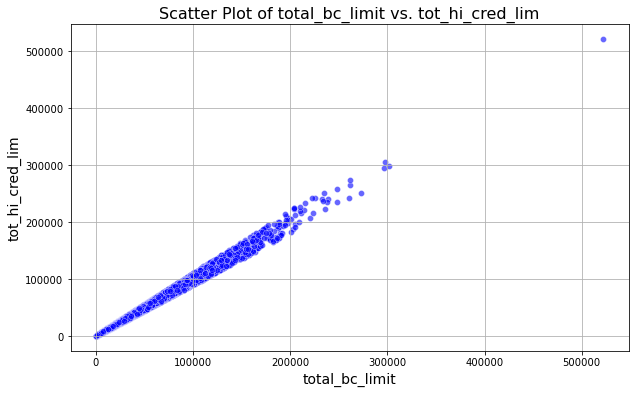

In [62]:
## scatter plot of 'total_bc_limit'and 'tot_hi_cred_lim'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bc_limit', y='tot_hi_cred_lim', data=data, color='blue', alpha=0.6)
plt.title('Scatter Plot of total_bc_limit vs. tot_hi_cred_lim', fontsize=16)
plt.xlabel('total_bc_limit', fontsize=14)
plt.ylabel('tot_hi_cred_lim', fontsize=14)
plt.grid(True)
plt.show()

##### linear relationship between 'total_bc_limit' and 'tot_hi_cred_lim'. can delete one feature

### See how other features distributes on the response

Features to plot: ['loan_amnt', 'int_rate', 'annual_inc', 'percent_bc_gt_75', 'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq', 'revol_util', 'total_bc_limit', 'mths_since_last_major_derog', 'tot_hi_cred_lim', 'tot_cur_bal', 'internal_score']


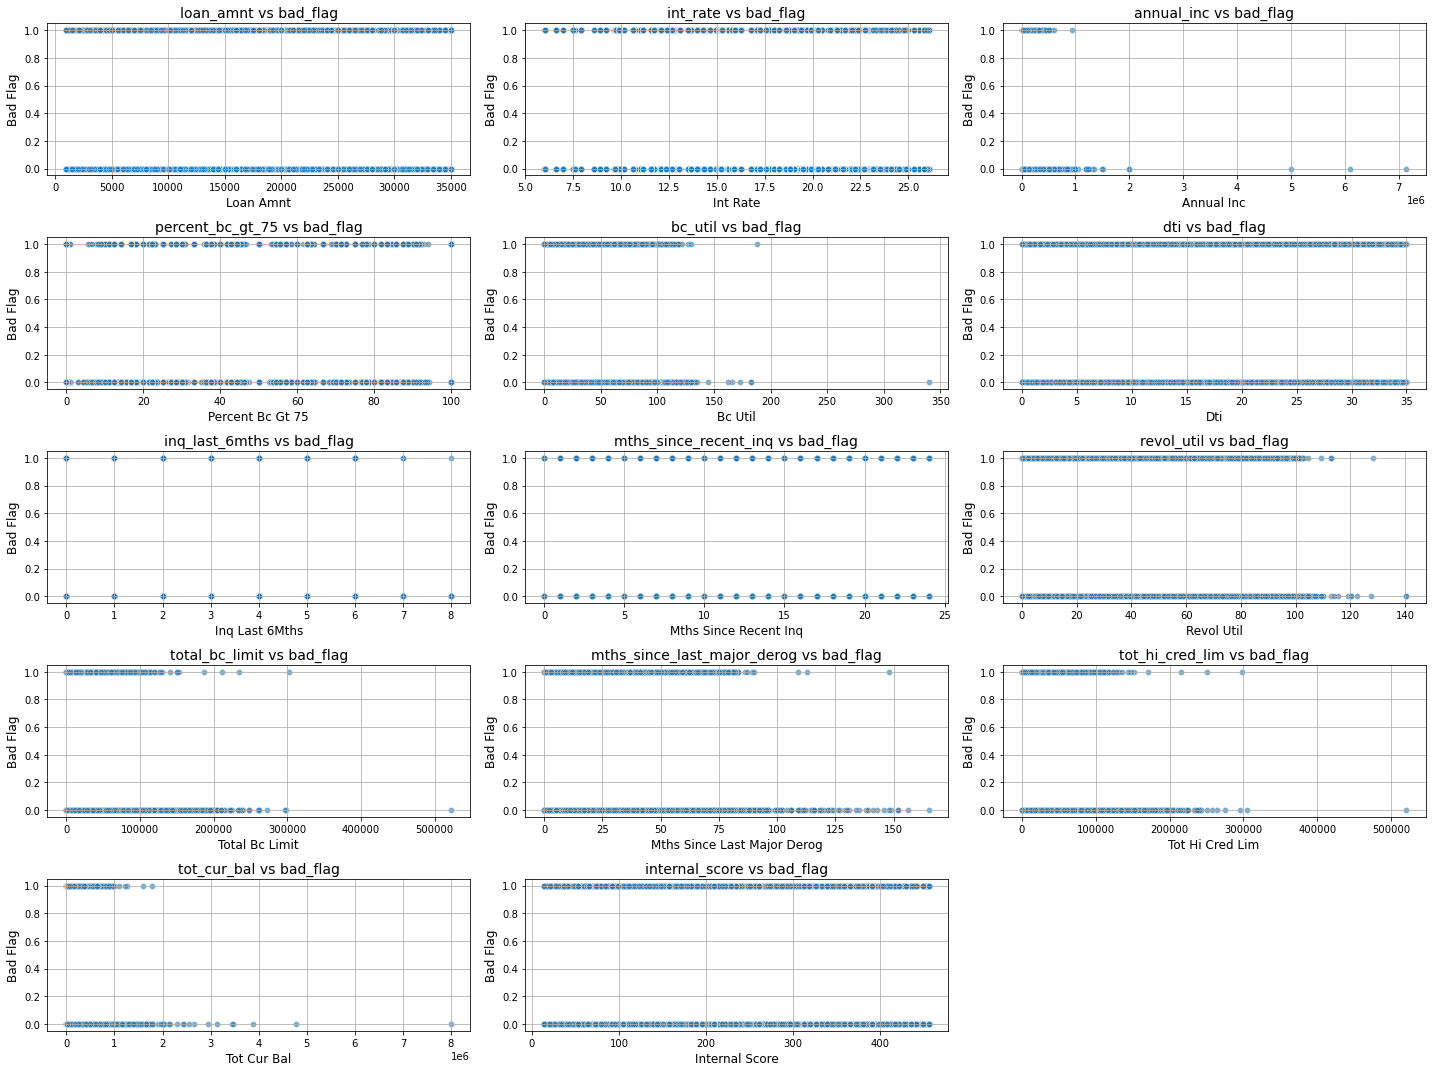

In [25]:
import math
y = 'bad_flag'

# Automatically select all numeric columns excluding the target
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
x_vars = [col for col in numeric_cols if col != y]

print("Features to plot:", x_vars)

def generate_scatter_plots(data, x_vars, y, cols=3, figsize=(20, 15)):

    num_vars = len(x_vars)
    rows = math.ceil(num_vars / cols)

    # Set up the matplotlib figure
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten in case of multiple rows

    for i, x in enumerate(x_vars):
        sns.scatterplot(x=x, y=y, data=data, ax=axes[i], alpha=0.6, edgecolor='w', palette='viridis')
        axes[i].set_title(f'{x} vs {y}', fontsize=14)
        axes[i].set_xlabel(x.replace('_', ' ').title(), fontsize=12)
        axes[i].set_ylabel(y.replace('_', ' ').title(), fontsize=12)
        axes[i].grid(True)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    
# Call the function with your data
generate_scatter_plots(data, x_vars, y, cols=3, figsize=(20, 15))


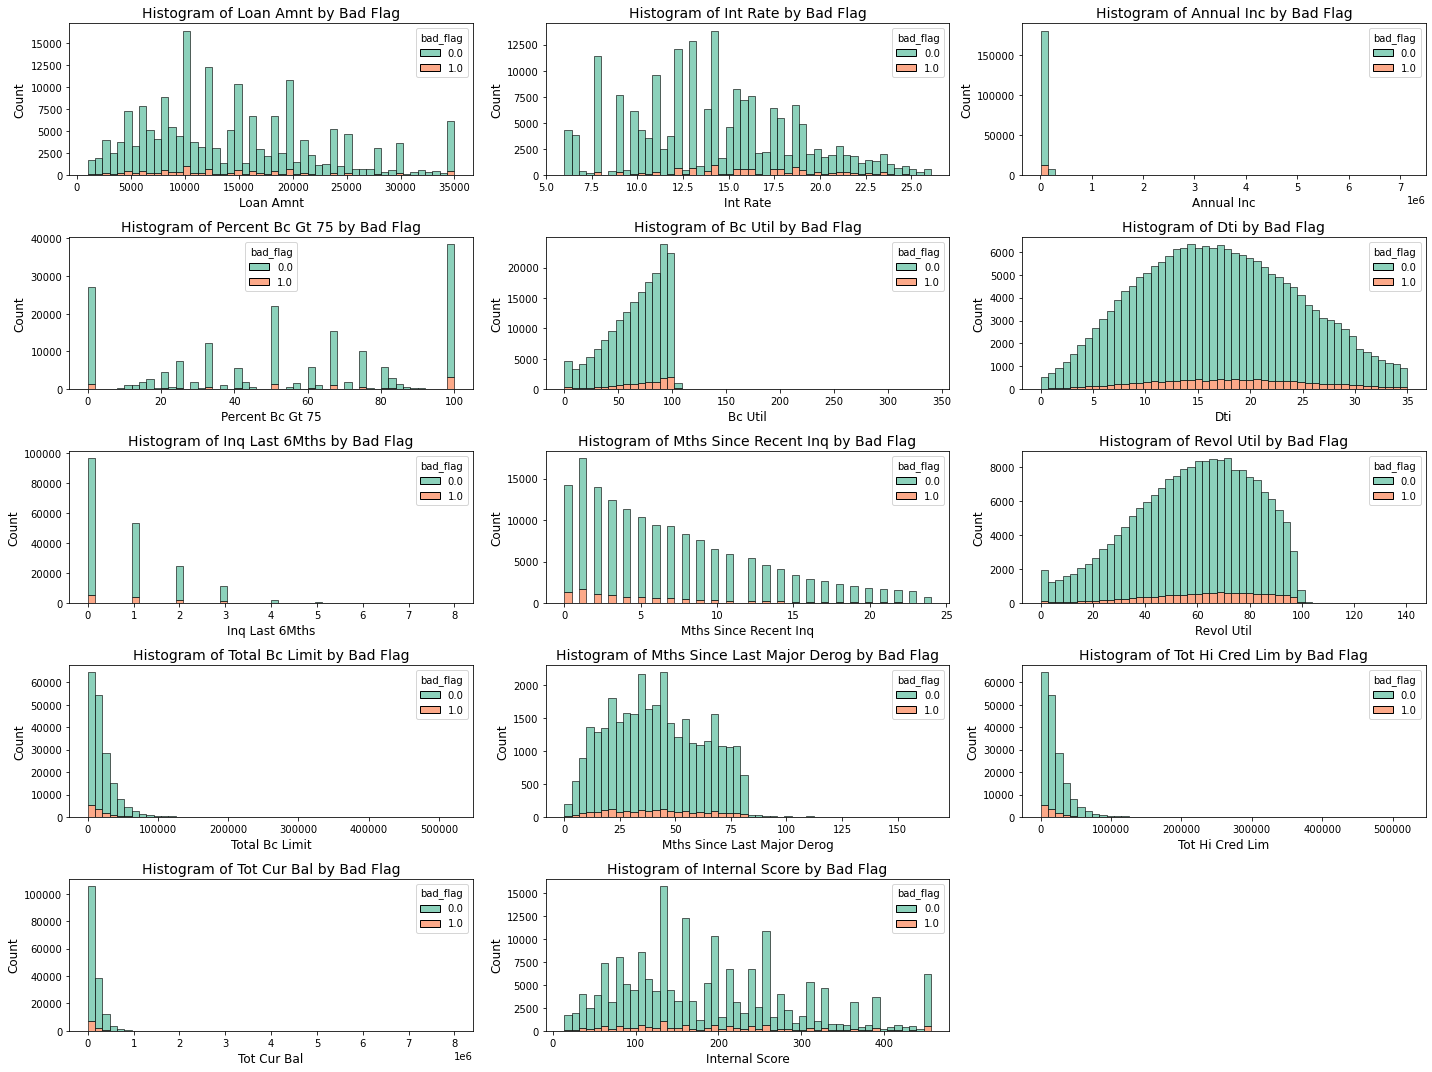

In [26]:
def generate_histogram_plots(data, x_vars, y, cols=3, figsize=(20, 15), bins=50):

    num_vars = len(x_vars)
    rows = math.ceil(num_vars / cols)
    
    # Set up the matplotlib figure
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten in case of multiple rows
    
    for i, x in enumerate(x_vars):
        sns.histplot(data=data, x=x, hue=y, bins=bins, ax=axes[i], palette='Set2', kde=False, multiple='stack')
        axes[i].set_title(f'Histogram of {x.replace("_", " ").title()} by {y.replace("_", " ").title()}', fontsize=14)
        axes[i].set_xlabel(x.replace("_", " ").title(), fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Call the function with your data
generate_histogram_plots(data, x_vars, y, cols=3, figsize=(20, 15), bins=50)


#### Find outliers from previous plot. Use z_scores to detect outliers

In [27]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data['annual_inc']))
outliers_z = np.where(z_scores > 3)
print(f"Number of outliers detected by Z-score method: {len(outliers_z[0])}")

Number of outliers detected by Z-score method: 1919


In [28]:
z_scores = np.abs(stats.zscore(data['tot_hi_cred_lim']))
outliers_z = np.where(z_scores > 3)
print(f"Number of outliers detected by Z-score method: {len(outliers_z[0])}")

Number of outliers detected by Z-score method: 0


In [29]:
z_scores = np.abs(stats.zscore(data['tot_cur_bal']))
outliers_z = np.where(z_scores > 3)
print(f"Number of outliers detected by Z-score method: {len(outliers_z[0])}")

Number of outliers detected by Z-score method: 0


#### Only 'annual_inc' has outiers

No handles with labels found to put in legend.


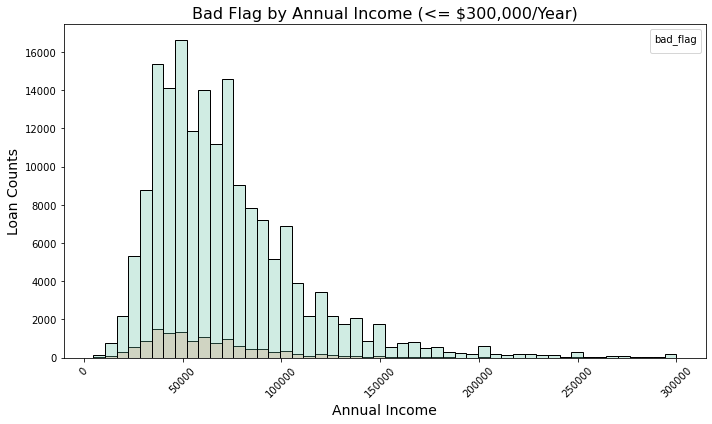

In [65]:
# Filter data where annual_inc <= 300,000 and check distribution
filtered_data = data[data['annual_inc'] <= 3e5]
x = 'annual_inc'
y = 'bad_flag'

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram for each loan_status
sns.histplot(data=filtered_data, x=x, hue=y, bins=50, alpha=0.3, palette='Set2', multiple='layer')

# Customize the plot
plt.title("Bad Flag by Annual Income (<= \$300,000/Year)", fontsize=16)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Loan Counts", fontsize=14)
plt.legend(title=y, loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [43]:
data.loc[data.annual_inc >= 3e5, 'bad_flag'].value_counts()

0.0    833
1.0     34
Name: bad_flag, dtype: int64

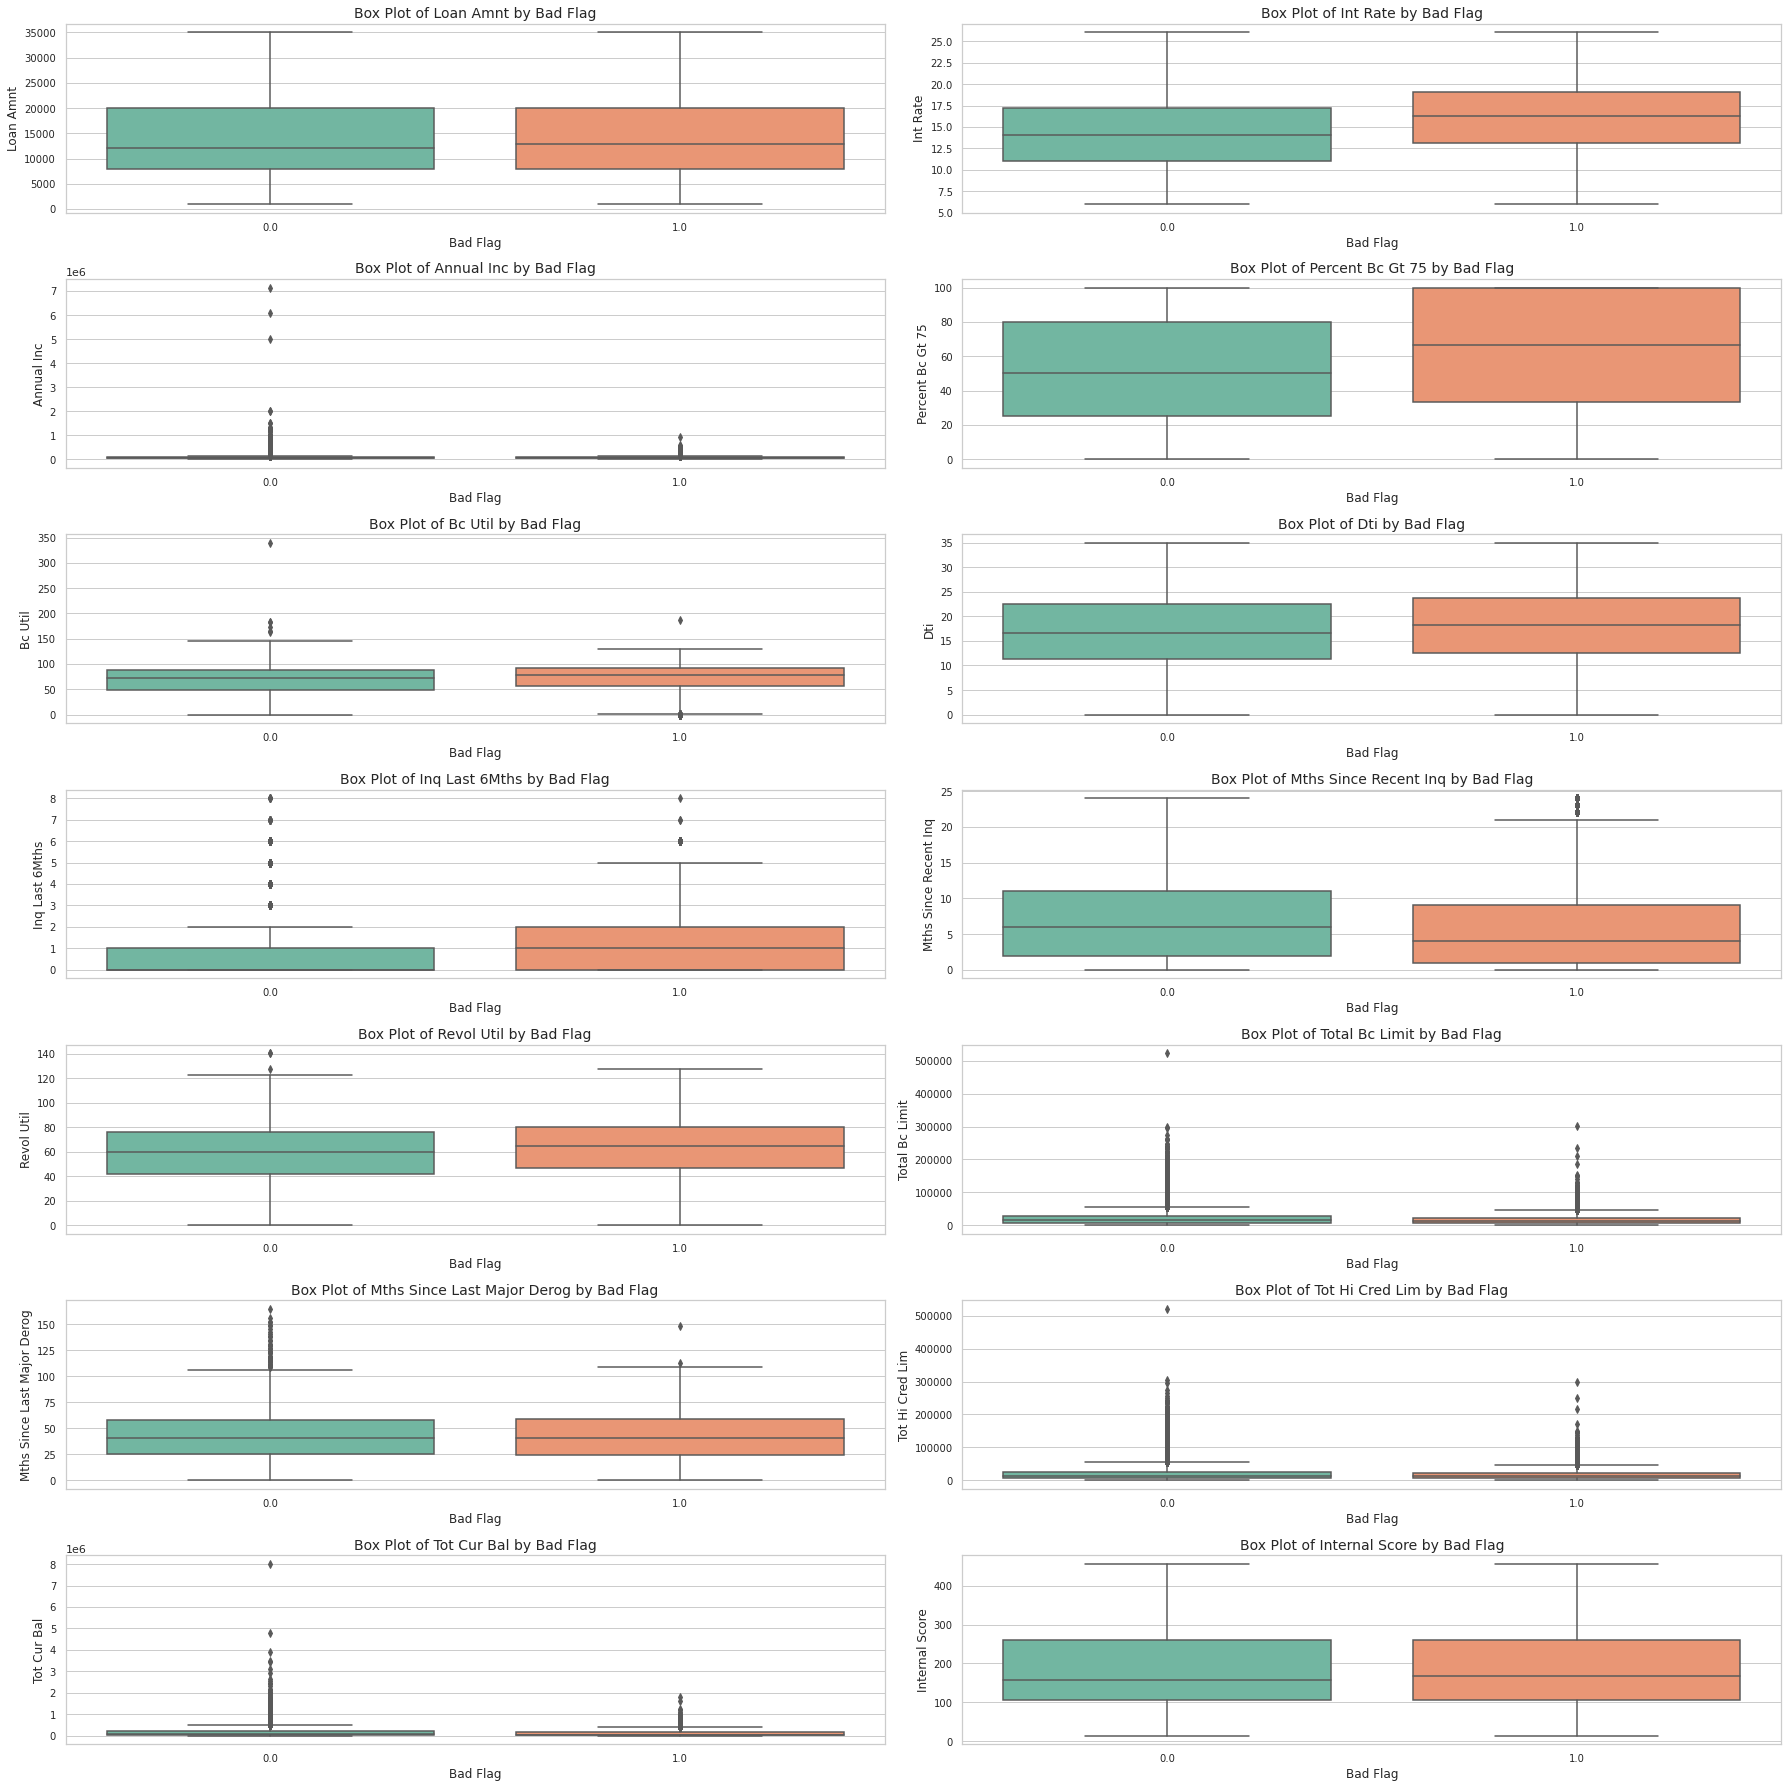

In [100]:
### check box plot
def generate_box_plots(data, x_vars, y, cols=2, figsize=(15, 5)):

    num_vars = len(x_vars)
    rows = math.ceil(num_vars / cols)

    # Set up the matplotlib figure
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten in case of multiple rows

    for i, x in enumerate(x_vars):
        sns.boxplot(x=y, y=x, data=data, ax=axes[i], palette='Set2')
        axes[i].set_title(f'Box Plot of {x.replace("_", " ").title()} by {y.replace("_", " ").title()}', fontsize=14)
        axes[i].set_xlabel(y.replace("_", " ").title(), fontsize=12)
        axes[i].set_ylabel(x.replace("_", " ").title(), fontsize=12)
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
    
# Call the function
generate_box_plots(data, x_vars, y, cols=2, figsize=(25, 25))


In [101]:
# Initialize list to store outlier indices
outlier_indices_iqr = []

for col in x_vars:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index.tolist()
    outlier_indices_iqr.extend(outliers)

# Remove duplicates
outlier_indices_iqr = list(set(outlier_indices_iqr))

print(f"Number of outliers detected by IQR method: {len(outlier_indices_iqr)}")


Number of outliers detected by IQR method: 31481


In [102]:
total_records = data.shape[0]
num_outliers_iqr = 31481  # Replace with your actual count
proportion_iqr = (num_outliers_iqr / total_records) * 100
print(f"Proportion of outliers detected by IQR method: {proportion_iqr:.2f}%")


Proportion of outliers detected by IQR method: 16.62%


##### Too much outliers if using IQR

Categorical Columns to Plot: ['term', 'emp_length', 'home_ownership', 'purpose']


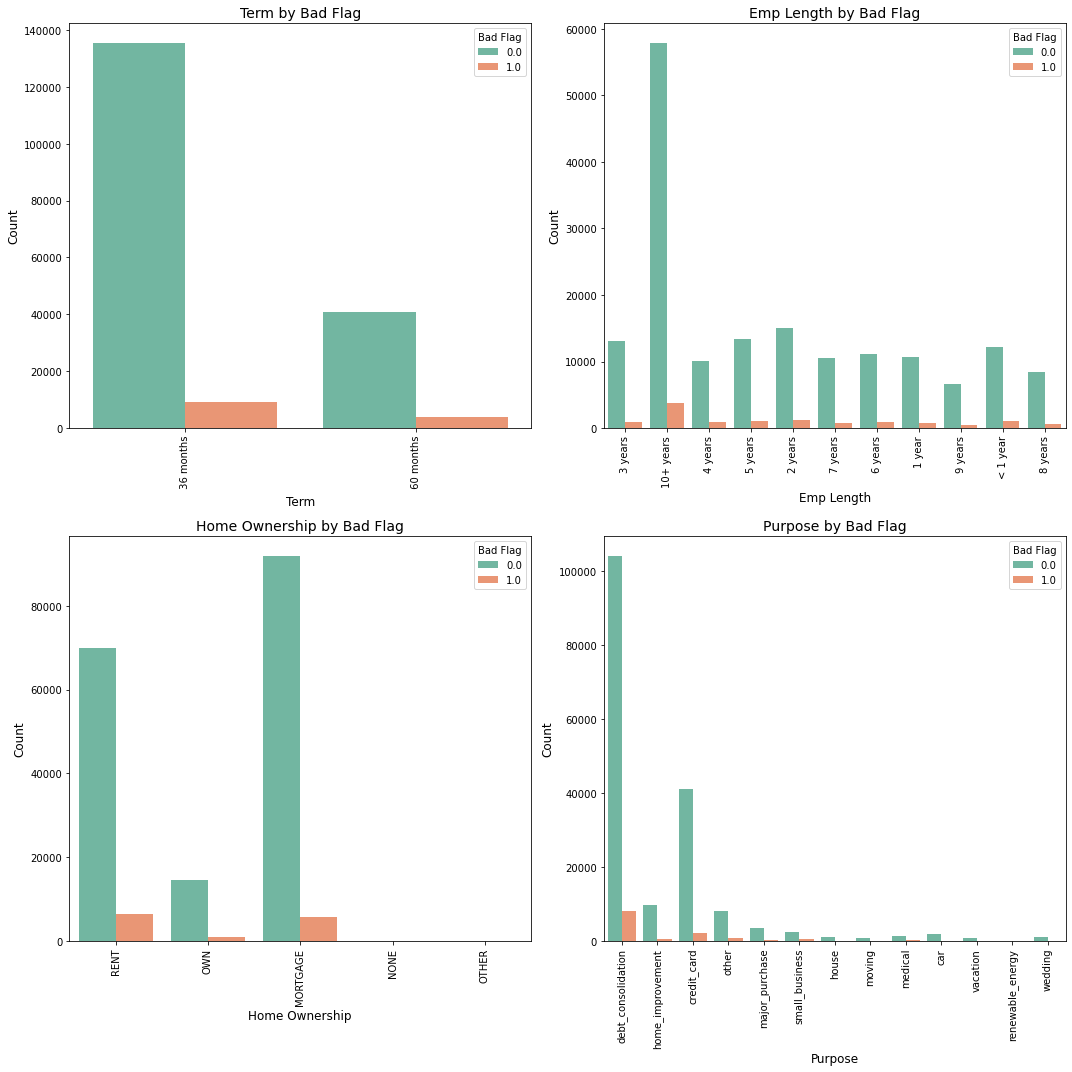

In [84]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude the target variable if it's categorical
target = 'bad_flag'
categorical_cols = [col for col in categorical_cols if col != target]

print("Categorical Columns to Plot:", categorical_cols)

def generate_categorical_bar_plots(data, categorical_cols, target, cols=2, figsize=(15, 10)):

    num_vars = len(categorical_cols)
    rows = math.ceil(num_vars / cols)
    
    # Set up the matplotlib figure
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten in case of multiple rows
    
    for i, col in enumerate(categorical_cols):
        sns.countplot(x=col, hue=target, data=data, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{col.replace("_", " ").title()} by {target.replace("_", " ").title()}', fontsize=14)
        axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].tick_params(axis='x', rotation=90)
        axes[i].legend(title=target.replace("_", " ").title())
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

    
generate_categorical_bar_plots(data, categorical_cols, target, cols=2, figsize=(15, 15))

# Data PreProcessing

## outlier removal

In [30]:
# Define the threshold
threshold = 3e5  # 1,000,000

# Remove outliers
data_cleaned = data[data['annual_inc'] < threshold].copy()

# Reset the index if necessary
data_cleaned.reset_index(drop=True, inplace=True)

# Display the number of records before and after removal
print(f"Original dataset size: {data.shape[0]}")
print(f"Cleaned dataset size: {data_cleaned.shape[0]}")


Original dataset size: 189457
Cleaned dataset size: 188590


### remove highly correlated features

In [31]:
data_cleaned = data_cleaned.drop(columns=['internal_score', 'total_bc_limit'])

In [33]:
## check missing value
for column in data_cleaned.columns:
    if data_cleaned[column].isna().sum() != 0:
        missing = data_cleaned[column].isna().sum()
        portion = (missing / data_cleaned.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_length': number of missing values '7921' ==> '4.200%'
'percent_bc_gt_75': number of missing values '8993' ==> '4.769%'
'bc_util': number of missing values '9075' ==> '4.812%'
'mths_since_recent_inq': number of missing values '27891' ==> '14.789%'
'revol_util': number of missing values '126' ==> '0.067%'
'mths_since_last_major_derog': number of missing values '155990' ==> '82.714%'
'tot_hi_cred_lim': number of missing values '7459' ==> '3.955%'
'tot_cur_bal': number of missing values '27629' ==> '14.650%'


In [35]:
# Select numerical columns (integer and float types)
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the list of numerical columns
print("Numerical Columns Before Encoding:")
print(numerical_columns)


Numerical Columns Before Encoding:
['loan_amnt', 'int_rate', 'annual_inc', 'percent_bc_gt_75', 'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq', 'revol_util', 'mths_since_last_major_derog', 'tot_hi_cred_lim', 'tot_cur_bal', 'bad_flag']


In [36]:
# Select categorical columns (obj types)
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns.tolist()

# Display the list of numerical columns
print("Categorical Columns Before Encoding:")
print(categorical_columns)

Categorical Columns Before Encoding:
['term', 'emp_length', 'home_ownership', 'purpose']


### Fill missing values

In [37]:
# 1. Fill 'percent_bc_gt_75' with 0
data_cleaned['percent_bc_gt_75'].fillna(0, inplace=True)

# 2. Fill 'bc_util' with the median
bc_util_median = data_cleaned['bc_util'].median()
data_cleaned['bc_util'].fillna(bc_util_median, inplace=True)

# 3. Fill 'mths_since_recent_inq' with 0
data_cleaned['mths_since_recent_inq'].fillna(0, inplace=True)

# 4. Fill 'revol_util' with the median
revol_util_median = data_cleaned['revol_util'].median()
data_cleaned['revol_util'].fillna(revol_util_median, inplace=True)

# 5. Fill 'mths_since_last_major_derog' with 0
data_cleaned['mths_since_last_major_derog'].fillna(0, inplace=True)

# 6. Fill 'tot_hi_cred_lim' with the median
tot_hi_cred_lim_median = data_cleaned['tot_hi_cred_lim'].median()
data_cleaned['tot_hi_cred_lim'].fillna(tot_hi_cred_lim_median, inplace=True)

# 7. Fill 'tot_cur_bal' with the median
tot_cur_bal_median = data_cleaned['tot_cur_bal'].median()
data_cleaned['tot_cur_bal'].fillna(tot_cur_bal_median, inplace=True)

# Verify that there are no more missing values in these columns
print(data_cleaned[['percent_bc_gt_75', 'bc_util', 'mths_since_recent_inq', 
            'revol_util', 'mths_since_last_major_derog', 
            'tot_hi_cred_lim', 'tot_cur_bal']].isnull().sum())


percent_bc_gt_75               0
bc_util                        0
mths_since_recent_inq          0
revol_util                     0
mths_since_last_major_derog    0
tot_hi_cred_lim                0
tot_cur_bal                    0
dtype: int64


In [38]:
## For categorical variables, use mode (most frequent) to fill
# Verify that there are no more missing values in categorical columns

from sklearn.impute import SimpleImputer
# Initialize SimpleImputer for categorical columns
imputer_mode = SimpleImputer(strategy='most_frequent')

# Apply imputer to categorical columns
data_cleaned[categorical_columns] = imputer_mode.fit_transform(data_cleaned[categorical_columns])

print(data_cleaned[categorical_columns].isnull().sum())

term              0
emp_length        0
home_ownership    0
purpose           0
dtype: int64


In [40]:
### Encode categorical variables (switch to numerical vars)
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# 'emp_length' is ordinal, define the order
emp_length_order = [
    '< 1 year', '1 year', '2 years', '3 years', '4 years',
    '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'
]

# Initialize OrdinalEncoder for 'emp_length'
ordinal_emp_length = OrdinalEncoder(categories=[emp_length_order])

# Initialize OneHotEncoders for nominal features
ohe_home_ownership = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
ohe_purpose = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# Initialize LabelEncoder for 'term' if treating it as binary
le_term = LabelEncoder()

# Encode 'term' using LabelEncoder
data_cleaned['term_encoded'] = le_term.fit_transform(data_cleaned['term'])

# Encode 'emp_length' using OrdinalEncoder
data_cleaned['emp_length_encoded'] = ordinal_emp_length.fit_transform(data_cleaned[['emp_length']])

# One-Hot Encode 'home_ownership'
home_ownership_ohe = ohe_home_ownership.fit_transform(data_cleaned[['home_ownership']])
home_ownership_df = pd.DataFrame(
    home_ownership_ohe,
    columns=ohe_home_ownership.get_feature_names_out(['home_ownership'])
)

# One-Hot Encode 'purpose'
purpose_ohe = ohe_purpose.fit_transform(data_cleaned[['purpose']])
purpose_df = pd.DataFrame(
    purpose_ohe,
    columns=ohe_purpose.get_feature_names_out(['purpose'])
)

# Concatenate the One-Hot Encoded columns with the original DataFrame
data_cleaned = pd.concat([data_cleaned, home_ownership_df, purpose_df], axis=1)

# Drop the original categorical columns
data_cleaned.drop(['term', 'emp_length', 'home_ownership', 'purpose'], axis=1, inplace=True)
data_cleaned.head()

/nfs/home/dbo/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/nfs/home/dbo/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,loan_amnt,int_rate,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,mths_since_last_major_derog,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,7550,16.24,28000.0,100.0,96.0,8.40,0.0,17.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27050,10.99,55000.0,25.0,53.9,22.87,0.0,8.0,61.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12000,10.99,60000.0,0.0,15.9,4.62,1.0,3.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12000,13.53,40000.0,33.3,79.6,16.94,0.0,17.0,68.8,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11500,22.90,32760.0,50.0,70.1,27.06,0.0,14.0,70.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Identify duplicate rows

In [41]:

duplicate_rows = data_cleaned.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
#print(f"Number of duplicate rows: {num_duplicates}")

# Retrieve duplicate rows
duplicate_data = data_cleaned[data_cleaned.duplicated()]

# Display the first few duplicate rows
print(duplicate_data.head(20))

# Remove exact duplicates, keeping the first occurrence
data_cleaned_no_duplicates = data_cleaned.drop_duplicates()

Number of duplicate rows: 1324
        loan_amnt  int_rate  annual_inc  percent_bc_gt_75  bc_util    dti  \
187266      16000     11.55     70777.0              62.5     73.8  25.52   
187267       4950     21.15     32000.0             100.0    101.8  17.25   
187268      20000     13.05    135000.0               0.0     52.7   9.08   
187269      15000      6.03     75000.0              25.0     33.9  24.83   
187270       8000      7.90     39000.0              11.1     19.9  25.64   
187271       7000     16.78     42000.0             100.0     87.9  12.74   
187272      12000      6.03     75928.0               0.0      6.1   5.33   
187273      14000     15.22     92000.0             100.0    100.0  12.39   
187274      16000     11.55     36000.0              60.0     58.5  32.77   
187275       7200     12.35     26000.0              33.3     64.4  16.15   
187276      25000     10.64     84000.0              66.7     63.6  17.45   
187277       7125     13.68     30700.0      

In [45]:
## To scale x variables
x_numerical_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'percent_bc_gt_75', 
                       'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq',
                     'revol_util', 'mths_since_last_major_derog', 'tot_hi_cred_lim', 'tot_cur_bal']


# Model Building

Training Set Size (before SMOTE): 140449 samples
Validation Set Size: 46817 samples


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff6b78b31f0>
Traceback (most recent call last):
  File "/sw/isaac/applications/anaconda3/2021.05/rhel8_gcc10.2.0/anaconda3-2021.05/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/sw/isaac/applications/anaconda3/2021.05/rhel8_gcc10.2.0/anaconda3-2021.05/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/sw/isaac/applications/anaconda3/2021.05/rhel8_gcc10.2.0/anaconda3-2021.05/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/sw/isaac/applications/anaconda3/2021.05/rhel8_gcc10.2.0/anaconda3-2021.05/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = 

Training Set Size (after SMOTE): 261258 samples
Using device: cuda
BinaryClassificationModel(
  (network): Sequential(
    (0): Linear(in_features=30, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.1, inplace=False)
    (5): Linear(in_features=32, out_features=1, bias=True)
  )
)
Epoch 1/100 | Train Loss: 0.6926 | Val Loss: 0.7056 | Val Accuracy: 0.4114
Epoch 2/100 | Train Loss: 0.6847 | Val Loss: 0.6965 | Val Accuracy: 0.4815
Epoch 3/100 | Train Loss: 0.6764 | Val Loss: 0.6900 | Val Accuracy: 0.5209
Epoch 4/100 | Train Loss: 0.6677 | Val Loss: 0.6799 | Val Accuracy: 0.5517
Epoch 5/100 | Train Loss: 0.6593 | Val Loss: 0.6724 | Val Accuracy: 0.5675
Epoch 6/100 | Train Loss: 0.6530 | Val Loss: 0.6703 | Val Accuracy: 0.5723
Epoch 7/100 | Train Loss: 0.6481 | Val Loss: 0.6559 | Val Accuracy: 0.5941
Epoch 8/100 | Train Loss: 0.6452 | Val Loss: 0.6506 | Val Accuracy: 0.6002
Epoch 9/100 | Train Loss:

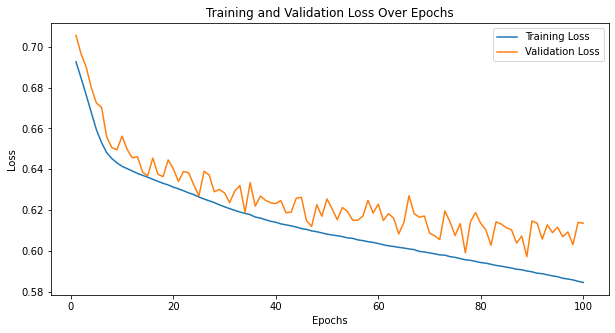

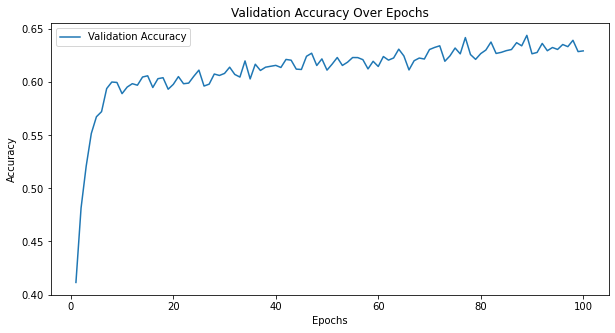


Model saved as 'binary_classification_model_smote.pth'.


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, f1_score

X = data_cleaned_no_duplicates.drop('bad_flag', axis=1)
y = data_cleaned_no_duplicates['bad_flag']

# Split the data into Training and Validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.25,          # 25% for Validation
    random_state=42,         # Ensures reproducibility
    stratify=y               # Maintains the distribution of 'bad_flag'
)

print(f"Training Set Size (before SMOTE): {X_train.shape[0]} samples")
print(f"Validation Set Size: {X_val.shape[0]} samples")

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the Training data
scaler.fit(X_train[x_numerical_columns])

# Transform the Training and Validation data
X_train_scaled = X_train.copy()
X_train_scaled[x_numerical_columns] = scaler.transform(X_train[x_numerical_columns])

X_val_scaled = X_val.copy()
X_val_scaled[x_numerical_columns] = scaler.transform(X_val[x_numerical_columns])

# Convert to NumPy arrays if they are not already
X_train_scaled = X_train_scaled.values.astype('float32')
X_val_scaled = X_val_scaled.values.astype('float32')
y_train = y_train.values
y_val = y_val.values

# Apply SMOTE on the training set to handle class imbalance
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

print(f"Training Set Size (after SMOTE): {X_train_resampled.shape[0]} samples")

# Convert the resampled data to tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

X_train_tensor = X_train_tensor.to(device)
X_val_tensor = X_val_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
y_val_tensor = y_val_tensor.to(device)

# Define batch size
batch_size = 5345

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


class BinaryClassificationModel(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassificationModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 42),
            nn.ReLU(),
            nn.Linear(42, 35),
            nn.ReLU(),
            nn.Dropout(0.4896),
            nn.Linear(35, 1)  # Output layer for binary classification
        )
        
    def forward(self, x):
        return self.network(x)

input_dim = X_train_resampled.shape[1]
model = BinaryClassificationModel(input_dim).to(device)
print(model)

criterion = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=0.0073409)

num_epochs = 100
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item() * batch_X.size(0)
    
    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    
    # Validation phase
    model.eval()
    epoch_val_loss = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            epoch_val_loss += loss.item() * batch_X.size(0)
            
            preds = torch.sigmoid(outputs)
            all_preds.append(preds.cpu())
            all_labels.append(batch_y.cpu())
    
    epoch_val_loss /= len(val_loader.dataset)
    val_losses.append(epoch_val_loss)
    
    all_preds = torch.cat(all_preds).numpy()
    all_labels = torch.cat(all_labels).numpy()
    
    binary_preds = (all_preds >= 0.5).astype(int)
    
    accuracy = accuracy_score(all_labels, binary_preds)
    val_accuracies.append(accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs} | '
          f'Train Loss: {epoch_train_loss:.4f} | '
          f'Val Loss: {epoch_val_loss:.4f} | '
          f'Val Accuracy: {accuracy:.4f}')

# Final Evaluation on Validation Set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        outputs = model(batch_X)
        preds = torch.sigmoid(outputs)
        all_preds.append(preds.cpu())
        all_labels.append(batch_y.cpu())

all_preds = torch.cat(all_preds).numpy()
all_labels = torch.cat(all_labels).numpy()

binary_preds = (all_preds >= 0.5).astype(int)

accuracy = accuracy_score(all_labels, binary_preds)
roc_auc = roc_auc_score(all_labels, all_preds)
auprc = average_precision_score(all_labels, all_preds)
f1 = f1_score(all_labels, binary_preds)

print("\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"AUPRC: {auprc:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Training and Validation Loss
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()

# Save the model (optional)
torch.save(model.state_dict(), 'binary_classification_model_smote.pth')
print("\nModel saved as 'binary_classification_model_smote.pth'.")


## Use Bayesian Optimization for optimal hyperparameters

In [47]:

from sklearn.metrics import roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from bayes_opt import BayesianOptimization

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1).to(device)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1).to(device)

# Define a function to create and train the model given hyperparameters
def train_and_evaluate(hn1, hn2, dr, lr, batch_size):
    hn1 = int(hn1)
    hn2 = int(hn2)
    dr = float(dr)
    lr = float(lr)
    batch_size = int(batch_size)

    class TunedBinaryClassificationModel(nn.Module):
        def __init__(self, input_dim, hn1, hn2, dr):
            super(TunedBinaryClassificationModel, self).__init__()
            self.fc1 = nn.Linear(input_dim, hn1)
            self.fc2 = nn.Linear(hn1, hn2)
            self.fc3 = nn.Linear(hn2, 1)
            self.dropout = nn.Dropout(dr)

        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = torch.relu(self.fc2(x))
            x = self.dropout(x)
            x = self.fc3(x)
            return x

    model = TunedBinaryClassificationModel(input_dim, hn1, hn2, dr).to(device)

    criterion = nn.BCEWithLogitsLoss()  
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Create DataLoaders with the given batch_size
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    num_epochs = 100  
    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            preds = torch.sigmoid(outputs).cpu().numpy()
            all_preds.append(preds)
            all_labels.append(batch_y.cpu().numpy())

    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    roc_auc = roc_auc_score(all_labels, all_preds)
    return roc_auc


def objective(hn1, hn2, dr, lr, batch_size):
    auc = train_and_evaluate(hn1, hn2, dr, lr, batch_size)
    return auc  # We want to maximize AUC, and bayes_opt maximizes by default

# Define search space
pbounds = {
    'hn1': (32, 128),
    'hn2': (16, 64),
    'dr': (0.0, 0.5),
    'lr': (1e-5, 1e-2),
    'batch_size': (32, 6800)
}

optimizer = BayesianOptimization(
    f=objective,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

# Initialize and run optimization
# init_points=10, then n_iter=40 for a total of 50 evaluations
optimizer.maximize(init_points=10, n_iter=40)

print("Best Result:", optimizer.max)
best_params = optimizer.max['params']
print("Best Hyperparameters found by Bayesian Optimization:")
print(best_params)


Using device: cuda
|   iter    |  target   | batch_... |    dr     |    hn1    |    hn2    |    lr     |
-------------------------------------------------------------------------------------
| 1         | 0.63      | 2.567e+03 | 0.4754    | 102.3     | 44.74     | 0.001569  |
| 2         | 0.5987    | 1.088e+03 | 0.02904   | 115.2     | 44.85     | 0.007084  |
| 3         | 0.6251    | 171.3     | 0.485     | 111.9     | 26.19     | 0.001826  |
| 4         | 0.615     | 1.273e+03 | 0.1521    | 82.38     | 36.73     | 0.002919  |
| 5         | 0.6276    | 4.173e+03 | 0.06975   | 60.05     | 33.59     | 0.004566  |
| 6         | 0.6373    | 5.346e+03 | 0.09984   | 81.37     | 44.44     | 0.000474  |
| 7         | 0.6183    | 4.144e+03 | 0.08526   | 38.24     | 61.55     | 0.009657  |
| 8         | 0.6207    | 5.503e+03 | 0.1523    | 41.38     | 48.84     | 0.004407  |
| 9         | 0.6301    | 858.0     | 0.2476    | 35.3      | 59.65     | 0.002595  |
| 10        | 0.6221    | 4.516e+03

In [58]:
## Check Val's performance
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, f1_score

# best_params from optimizer.max['params']
best_params ={'batch_size': 5345.879758680623, 'dr': 0.48961483633324776, 
              'hn1': 42.06460657796822, 'hn2': 35.822043448436816, 'lr': 0.0073409113435169565}
best_params = optimizer.max['params']
print("Best Hyperparameters:", best_params)

hn1 = int(best_params['hn1'])
hn2 = int(best_params['hn2'])
dr = float(best_params['dr'])
lr = float(best_params['lr'])
batch_size = int(best_params['batch_size'])

# Re-create DataLoaders with best batch_size
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1).to(device)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

class FinalBinaryClassificationModel(nn.Module):
    def __init__(self, input_dim, hn1, hn2, dr):
        super(FinalBinaryClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hn1)
        self.fc2 = nn.Linear(hn1, hn2)
        self.fc3 = nn.Linear(hn2, 1)
        self.dropout = nn.Dropout(dr)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

model = FinalBinaryClassificationModel(input_dim, hn1, hn2, dr).to(device)

# Define loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Train the final model with more epochs for better performance
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch_X.size(0)
    epoch_train_loss /= len(train_loader.dataset)

    # Optional: Monitor validation performance
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            preds = torch.sigmoid(outputs).cpu().numpy()
            all_preds.append(preds)
            all_labels.append(batch_y.cpu().numpy())

    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    roc_auc = roc_auc_score(all_labels, all_preds)
    print(f'Epoch {epoch+1}/{num_epochs} | Train Loss: {epoch_train_loss:.4f} | Val ROC AUC: {roc_auc:.4f}')

# Final evaluation on validation set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch_X, batch_y in val_loader:
        outputs = model(batch_X)
        preds = torch.sigmoid(outputs).cpu().numpy()
        all_preds.append(preds)
        all_labels.append(batch_y.cpu().numpy())

all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)

# Convert probabilities to binary predictions
binary_preds = (all_preds >= 0.5).astype(int)

# Calculate final metrics
accuracy = accuracy_score(all_labels, binary_preds)
roc_auc = roc_auc_score(all_labels, all_preds)
auprc = average_precision_score(all_labels, all_preds)
f1 = f1_score(all_labels, binary_preds)

print("\nFinal Validation Metrics with Optimized Hyperparameters:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"AUPRC: {auprc:.4f}")
print(f"F1 Score: {f1:.4f}")


Best Hyperparameters: {'batch_size': 5345.879758680623, 'dr': 0.48961483633324776, 'hn1': 42.06460657796822, 'hn2': 35.822043448436816, 'lr': 0.0073409113435169565}
Epoch 1/100 | Train Loss: 0.6457 | Val ROC AUC: 0.6652
Epoch 2/100 | Train Loss: 0.6173 | Val ROC AUC: 0.6611
Epoch 3/100 | Train Loss: 0.5977 | Val ROC AUC: 0.6637
Epoch 4/100 | Train Loss: 0.5673 | Val ROC AUC: 0.6517
Epoch 5/100 | Train Loss: 0.5364 | Val ROC AUC: 0.6456
Epoch 6/100 | Train Loss: 0.5096 | Val ROC AUC: 0.6481
Epoch 7/100 | Train Loss: 0.4963 | Val ROC AUC: 0.6395
Epoch 8/100 | Train Loss: 0.4797 | Val ROC AUC: 0.6370
Epoch 9/100 | Train Loss: 0.4735 | Val ROC AUC: 0.6421
Epoch 10/100 | Train Loss: 0.4662 | Val ROC AUC: 0.6481
Epoch 11/100 | Train Loss: 0.4633 | Val ROC AUC: 0.6481
Epoch 12/100 | Train Loss: 0.4652 | Val ROC AUC: 0.6435
Epoch 13/100 | Train Loss: 0.4629 | Val ROC AUC: 0.6425
Epoch 14/100 | Train Loss: 0.4594 | Val ROC AUC: 0.6397
Epoch 15/100 | Train Loss: 0.4523 | Val ROC AUC: 0.6483
Epoc

## Test

In [54]:
test = pd.read_csv('testing_loan_data.csv')
test.head()

/sw/isaac/applications/anaconda3/2021.05/rhel8_gcc10.2.0/anaconda3-2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,20000001,22419852,10000,36 months,22.15%,8 years,RENT,37000.0,NaN,debt_consolidation,...,1,3.0,73.10%,16200,NaN,14877.170280,36809,1,131,NaN
1,20000002,22349118,1400,36 months,18.24%,6 years,RENT,41000.0,NaN,other,...,0,9.0,11.50%,4000,NaN,4097.304770,19536,1,19,NaN
2,20000003,22398818,7000,36 months,12.49%,3 years,RENT,68900.0,NaN,debt_consolidation,...,0,11.0,48.10%,11900,80.0,12688.495160,241465,1,92,NaN
3,20000004,22419015,18000,60 months,16.29%,9 years,MORTGAGE,41000.0,NaN,debt_consolidation,...,1,0.0,38.10%,7600,73.0,7908.799817,179757,1,235,NaN
4,20000005,22388614,12000,36 months,12.99%,10+ years,MORTGAGE,64000.0,NaN,home_improvement,...,0,NaN,57.90%,21000,NaN,19378.561060,31953,1,157,NaN


In [55]:
test = test.drop(columns=['id', 'desc', 'member_id', 'application_approved_flag', 
                          'internal_score', 'total_bc_limit','bad_flag'])

# Function to clean percentage columns
def clean_percentage(column):
    return column.str.replace('%', '').astype(float)

# Apply the function to 'int_rate' and 'revol_rate' if they are strings
if test['int_rate'].dtype == 'object':
    test['int_rate'] = clean_percentage(test['int_rate'])

if test['revol_util'].dtype == 'object':
    test['revol_util'] = clean_percentage(test['revol_util'])

# Assume 'data_cleaned' is your training dataset after filling missing values, and 'test' is your test dataset.

# Apply the same zero or median fills to the test data
test['percent_bc_gt_75'].fillna(0, inplace=True)
test['bc_util'].fillna(bc_util_median, inplace=True)  # use bc_util_median from training
test['mths_since_recent_inq'].fillna(0, inplace=True)
test['revol_util'].fillna(revol_util_median, inplace=True)  # use revol_util_median from training
test['mths_since_last_major_derog'].fillna(0, inplace=True)
test['tot_hi_cred_lim'].fillna(tot_hi_cred_lim_median, inplace=True)  # from training
test['tot_cur_bal'].fillna(tot_cur_bal_median, inplace=True)  # from training

# For categorical columns, use the same imputer_mode fitted on data_cleaned
# Example:
# categorical_columns = [...]
# imputer_mode was fit on data_cleaned
test[categorical_columns] = imputer_mode.transform(test[categorical_columns])


In [56]:
# Assuming test is your test DataFrame
# and you have le_term, ordinal_emp_length, ohe_home_ownership, ohe_purpose already fitted from training

# 1. Encode 'term' using fitted LabelEncoder
test['term_encoded'] = le_term.transform(test['term'])

# 2. Encode 'emp_length' using fitted OrdinalEncoder
test['emp_length_encoded'] = ordinal_emp_length.transform(test[['emp_length']])

# 3. One-Hot Encode 'home_ownership' using fitted OneHotEncoder
home_ownership_ohe_test = ohe_home_ownership.transform(test[['home_ownership']])
home_ownership_df_test = pd.DataFrame(
    home_ownership_ohe_test, 
    columns=ohe_home_ownership.get_feature_names_out(['home_ownership'])
)

# 4. One-Hot Encode 'purpose' using fitted OneHotEncoder
purpose_ohe_test = ohe_purpose.transform(test[['purpose']])
purpose_df_test = pd.DataFrame(
    purpose_ohe_test,
    columns=ohe_purpose.get_feature_names_out(['purpose'])
)

# 5. Concatenate the One-Hot Encoded columns with the test DataFrame
test = pd.concat([test, home_ownership_df_test, purpose_df_test], axis=1)

# 6. Drop the original categorical columns from test
test.drop(['term', 'emp_length', 'home_ownership', 'purpose'], axis=1, inplace=True)

test.head()


,loan_amnt,int_rate,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,mths_since_last_major_derog,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000,22.15,37000.0,80.0,83.0,28.51,1,3.0,73.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1400,18.24,41000.0,0.0,0.0,26.58,0,9.0,11.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7000,12.49,68900.0,60.0,75.9,6.60,0,11.0,48.1,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18000,16.29,41000.0,33.3,61.1,20.61,1,0.0,38.1,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12000,12.99,64000.0,75.0,67.0,24.61,0,0.0,57.9,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:


# Scale numerical columns with the same scaler fitted on training data
test[x_numerical_columns] = scaler.transform(test[x_numerical_columns])

# Convert test DataFrame to tensors
X_test_tensor = torch.tensor(test.values, dtype=torch.float32).to(device)


# Create a DataLoader for test data (if you want batch inference)
test_dataset = TensorDataset(X_test_tensor)  # If no labels
# If you have labels:
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 2. Inference on Test Set
model.eval()
all_preds = []
all_labels = []  # If you have labels
with torch.no_grad():
    for batch in test_loader:
        batch_X = batch[0]
        outputs = model(batch_X)
        preds = torch.sigmoid(outputs).cpu().numpy()
        all_preds.append(preds)


all_preds = np.concatenate(all_preds)


print("Predicted probabilities on test data:", all_preds)

# Convert probabilities to binary predictions with a 0.5 threshold
binary_preds = (all_preds >= 0.5).astype(int)


# Suppose binary_preds is a (N,) numpy array
print(binary_preds.shape)  # Should print something like (N,)
print("binary_preds shape:", binary_preds.shape)
print("binary_preds:", binary_preds)
# Flatten the array
binary_preds = binary_preds.ravel()

# Now binary_preds is (N,) where N=102505
print(binary_preds.shape)  # Should print (102505,)

# Create DataFrame from flattened array
predictions_df = pd.DataFrame({'bad_flag': binary_preds})
predictions_df.to_csv('test_predictions.csv', index=False)
print("Predictions saved to test_predictions.csv.")


Predicted probabilities on test data: [[0.7004119 ]
 [0.4139411 ]
 [0.36945066]
 ...
 [0.03889468]
 [0.74906445]
 [0.55366313]]
(102505, 1)
binary_preds shape: (102505, 1)
binary_preds: [[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]
(102505,)
Predictions saved to test_predictions.csv.
